Importing the required libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os
from PIL import Image
%matplotlib widget

Loading the saved statistics CSV as a dataframe

In [44]:
data = pd.read_csv('data/output_data/the_land_of_the_perumauls/consolidated_footnotes.csv')
data.head()

,page_file,page_number,footnote_text,cluster_label,word_count
0,the_land_of_the_perumauls_page_21.jpg,21,"* Many of the following measurements, and othe...",2,67
1,the_land_of_the_perumauls_page_23.jpg,23,"* Mackenzie Manuscripts, Book No. 3. Counterma...",0,7
2,the_land_of_the_perumauls_page_25.jpg,25,"* In the first eleven years 2,008 in-patients ...",5,28
3,the_land_of_the_perumauls_page_27.jpg,27,"* Dutch Government Records, 1743 : but still, ...",5,26
4,the_land_of_the_perumauls_page_30.jpg,30,"* In the Dutch Records for 1743, it is express...",2,60


Creating a scatter plot of footnotes based on word count (Y-axis) and where in the text it appears (X-axis)

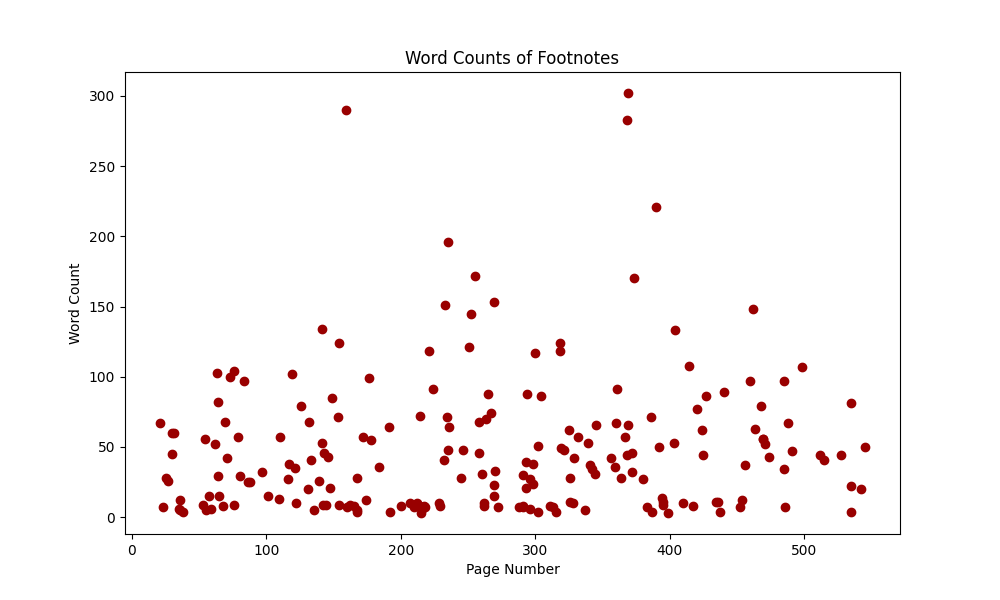

In [47]:
# Create the main figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(data['page_number'], data['word_count'], color='#990000', picker=5)  # Enable picking with tolerance
ax.set_xlabel('Page Number')
ax.set_ylabel('Word Count')
ax.set_title('Word Counts of Footnotes')

# Annotation boxes for text and image
text_annotation = None

# Show the text and image content on pick event
def onpick(event):
    global text_annotation
    if len(event.ind) > 0: 
        ind = event.ind[0]
        label = data['footnote_text'].iloc[ind]
        page_file = data['page_file'].iloc[ind]
        img = Image.open(f'data/digital_archives/administrative_archives/the_land_of_the_perumauls/the_land_of_the_perumauls_page_images/{page_file}')

        # Remove existing annotations if they exist
        if text_annotation:
            text_annotation.remove()

        img.show()    

        # Show text label
        text_annotation = plt.figtext(0.2, 0.5, label, wrap=True, horizontalalignment='left', fontsize=8, color="#993404")
        text_annotation.set_bbox(dict(facecolor='#fef0d9', alpha=0.5))

        fig.canvas.draw_idle()

# Connect the pick event to the onpick function
fig.canvas.mpl_connect('pick_event', onpick)

plt.show()